## Load all necessary libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
print(sns.__version__)


0.9.0


## Load the Data sets

In [2]:
train_raw= pd.read_csv('Data/train.csv')
test_raw= pd.read_csv('Data/test.csv')
train_raw.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [3]:
print(train_raw.shape)
print(test_raw.shape)

(10000, 12)
(2500, 11)


# Exploratory Data Analysis


### Check the distribution of output


In [4]:
print(train_raw['Severity'].unique())
print(len(train_raw['Severity'].unique()))

['Minor_Damage_And_Injuries' 'Significant_Damage_And_Fatalities'
 'Significant_Damage_And_Serious_Injuries' 'Highly_Fatal_And_Damaging']
4


Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64


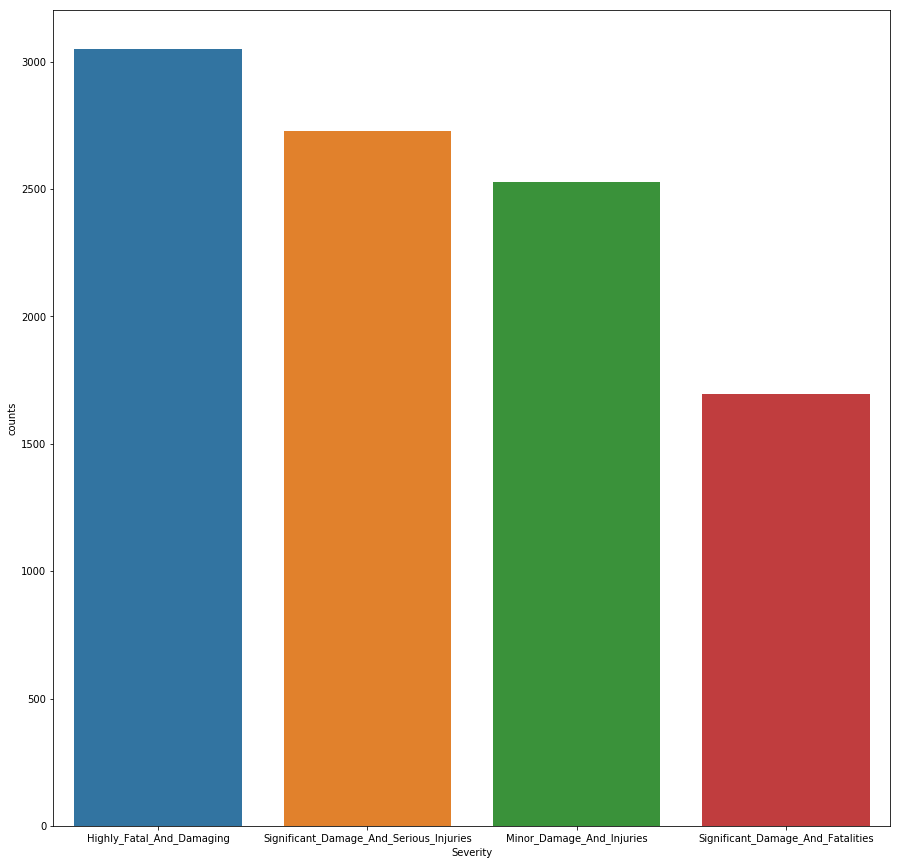

In [5]:
target_count=train_raw['Severity'].value_counts()
print(target_count)
plt.figure(figsize=(15,15))
sns.barplot(target_count.index,target_count.values)
plt.xlabel('Severity',fontsize=10)
plt.ylabel('counts',fontsize=10)
plt.show()

## Observation:
-- Imbalanced Data Set 

## More Data visualization 
    -- Pair plots to see if anything interesting.
    -- feature wise analysis to check if there is anything interesting 

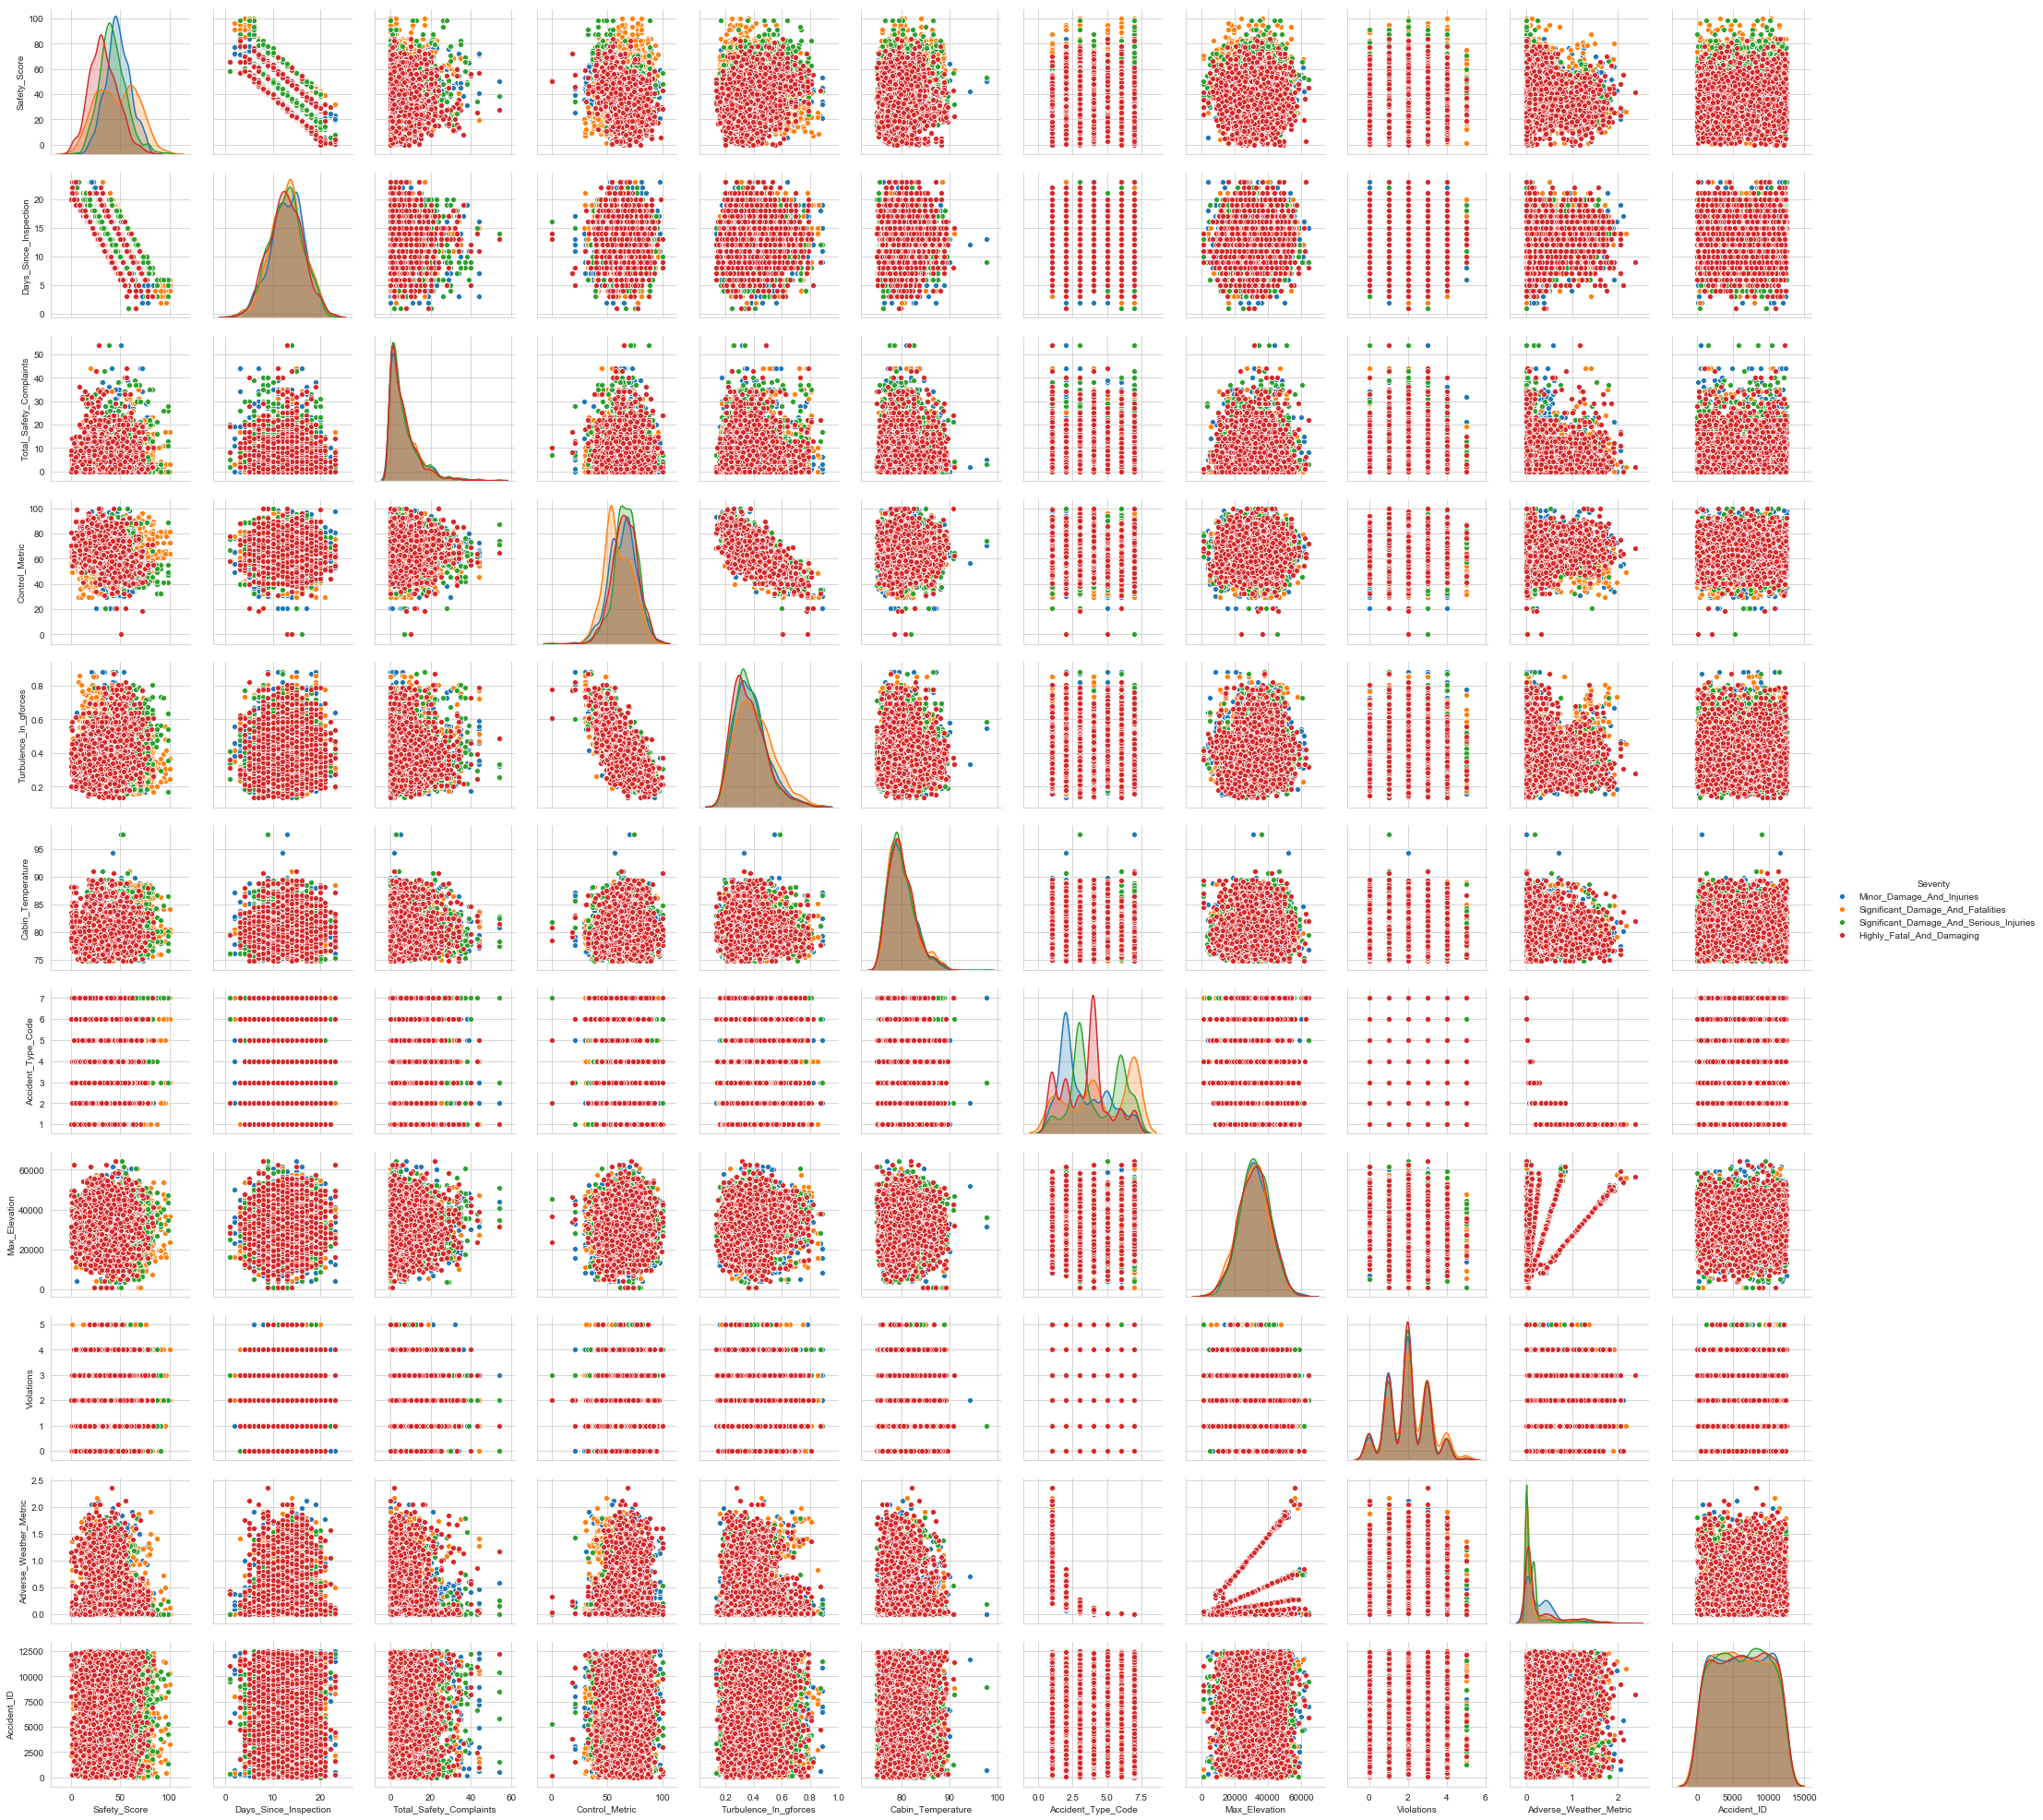

In [6]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(train_raw, hue="Severity");
plt.savefig('Pairplots.png',size=5)
plt.show()

count    10000.000000
mean        41.876406
std         16.138072
min          0.000000
25%         30.593607
50%         41.278539
75%         52.511416
max        100.000000
Name: Safety_Score, dtype: float64


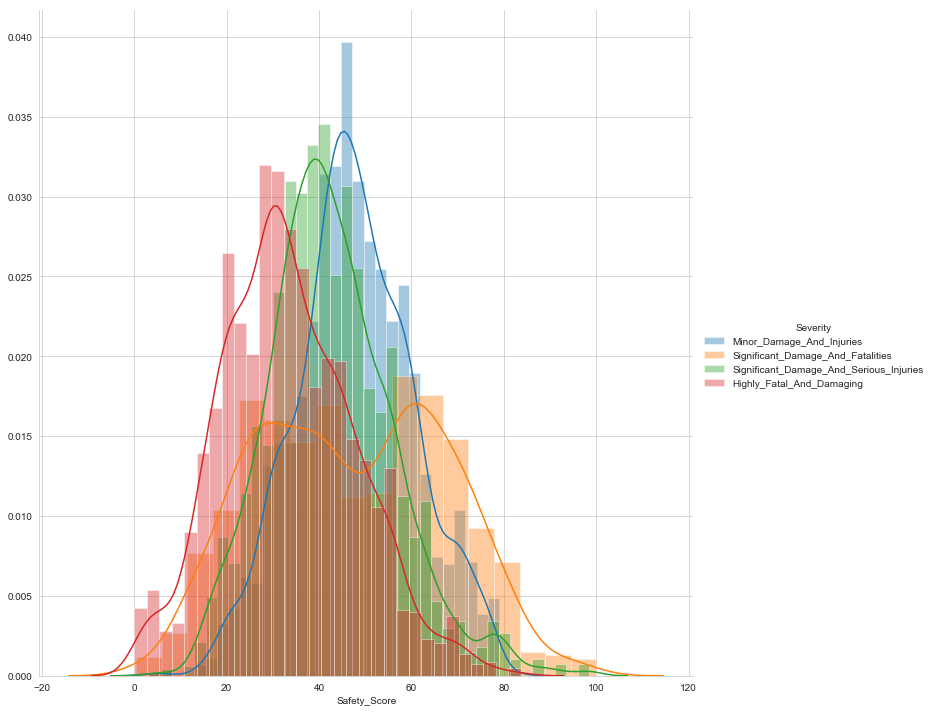

In [7]:
print(train_raw['Safety_Score'].describe())
sns.FacetGrid(train_raw, hue="Severity", size=10) \
   .map(sns.distplot, "Safety_Score") \
   .add_legend();
plt.show();

count    10000.000000
mean        12.931100
std          3.539803
min          1.000000
25%         11.000000
50%         13.000000
75%         15.000000
max         23.000000
Name: Days_Since_Inspection, dtype: float64


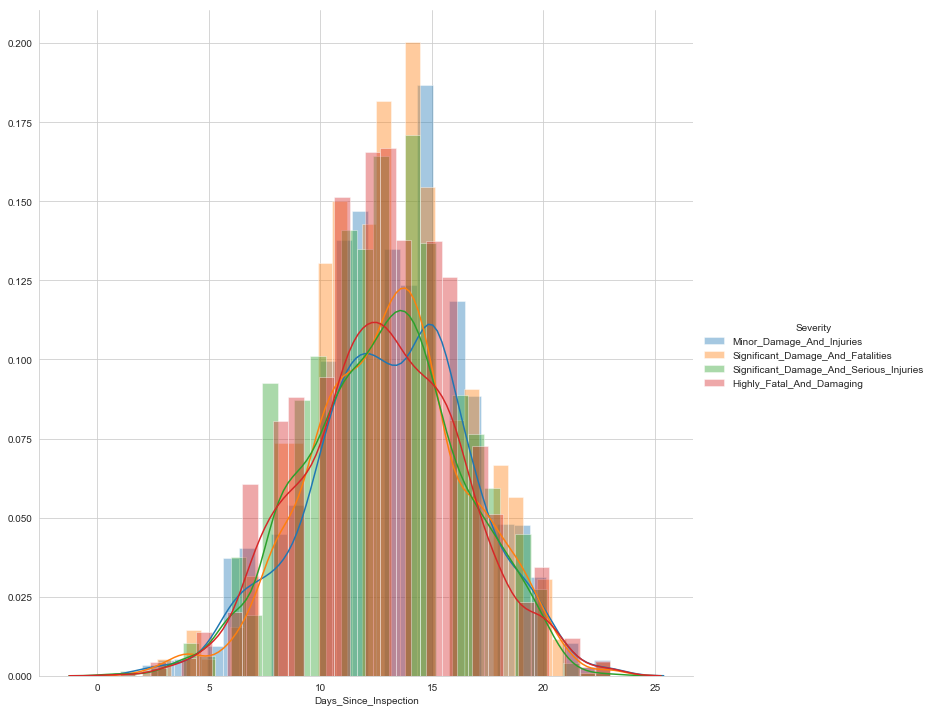

In [8]:
print(train_raw['Days_Since_Inspection'].describe())
sns.FacetGrid(train_raw, hue="Severity", size=10) \
   .map(sns.distplot, "Days_Since_Inspection") \
   .add_legend();
plt.show();


count    10000.000000
mean         6.564300
std          6.971982
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         54.000000
Name: Total_Safety_Complaints, dtype: float64


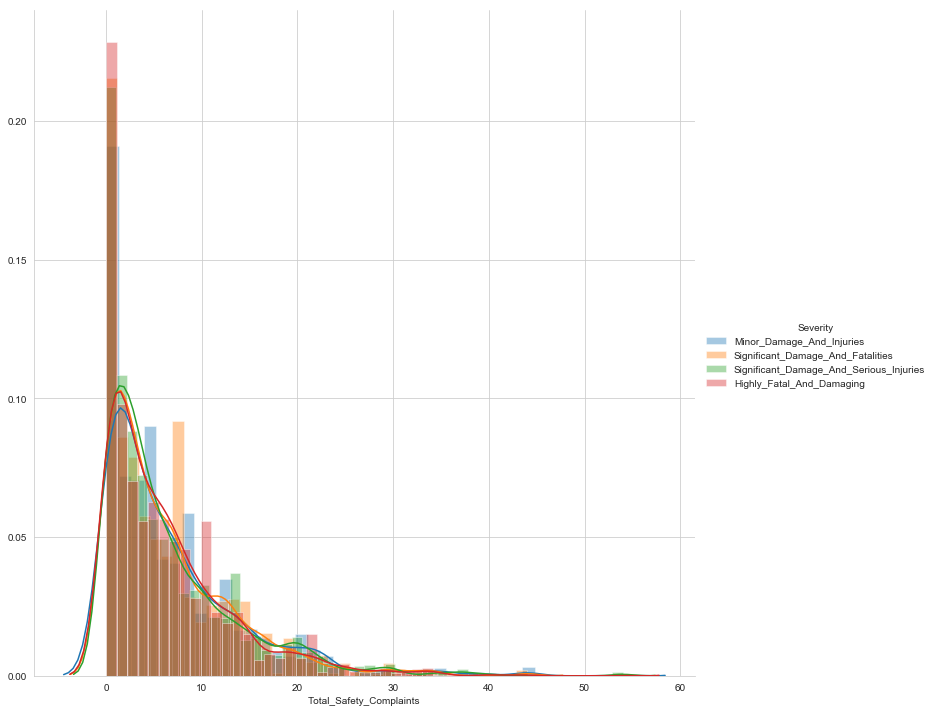

In [9]:
print(train_raw['Total_Safety_Complaints'].describe())
sns.FacetGrid(train_raw, hue="Severity", size=10) \
   .map(sns.distplot, "Total_Safety_Complaints") \
   .add_legend();
plt.show();


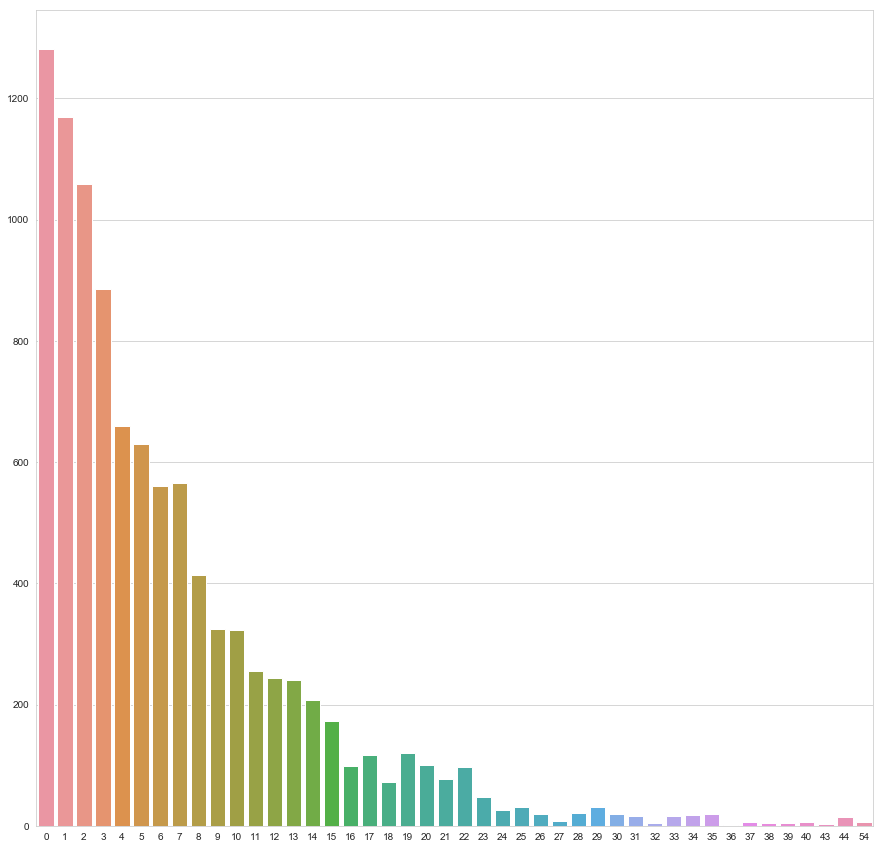

In [10]:
safety_counts=train_raw['Total_Safety_Complaints'].value_counts()
plt.figure(figsize=(15,15))
sns.barplot(safety_counts.index,safety_counts.values)
plt.show()

count    10000.000000
mean        65.145324
std         11.882934
min          0.000000
25%         56.927985
50%         65.587967
75%         73.336372
max        100.000000
Name: Control_Metric, dtype: float64


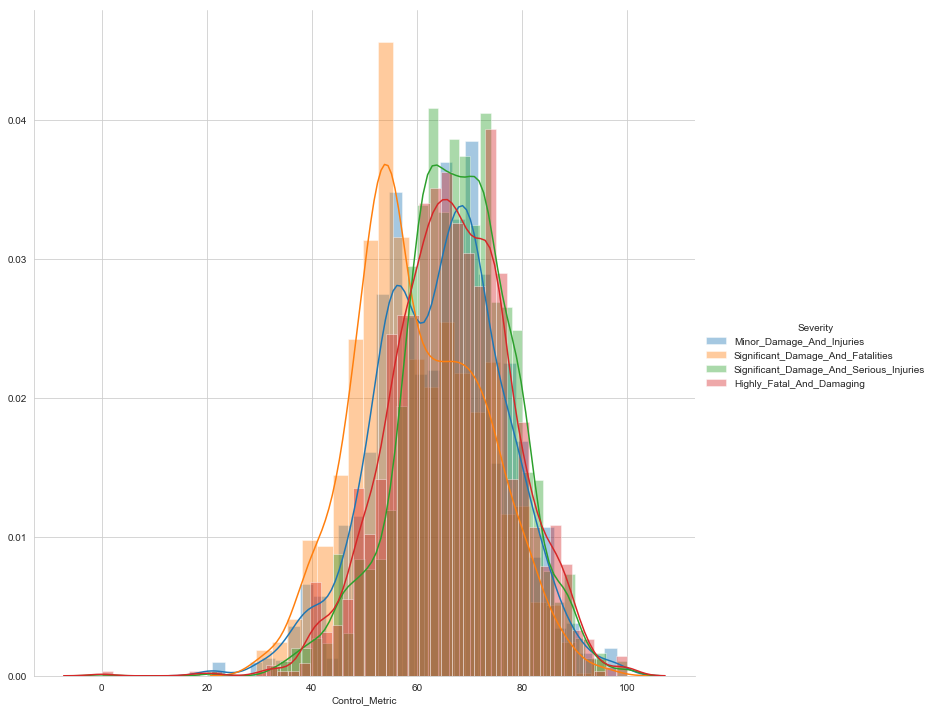

In [11]:

print(train_raw['Control_Metric'].describe())
sns.FacetGrid(train_raw, hue="Severity", size=10) \
   .map(sns.distplot, "Control_Metric") \
   .add_legend();
plt.show();


count    10000.000000
mean         0.381495
std          0.121301
min          0.134000
25%          0.293665
50%          0.365879
75%          0.451346
max          0.882648
Name: Turbulence_In_gforces, dtype: float64


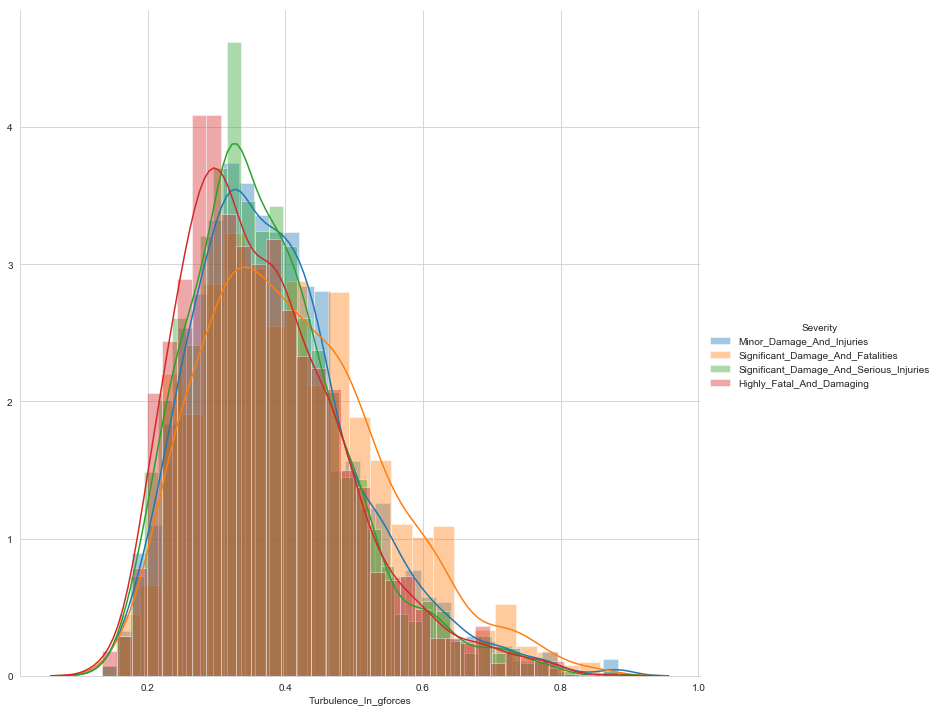

In [12]:

print(train_raw['Turbulence_In_gforces'].describe())
sns.FacetGrid(train_raw, hue="Severity", size=10) \
   .map(sns.distplot, "Turbulence_In_gforces") \
   .add_legend();
plt.show();


count    10000.000000
mean        79.969331
std          2.759739
min         74.740000
25%         77.960000
50%         79.540000
75%         81.560000
max         97.510000
Name: Cabin_Temperature, dtype: float64


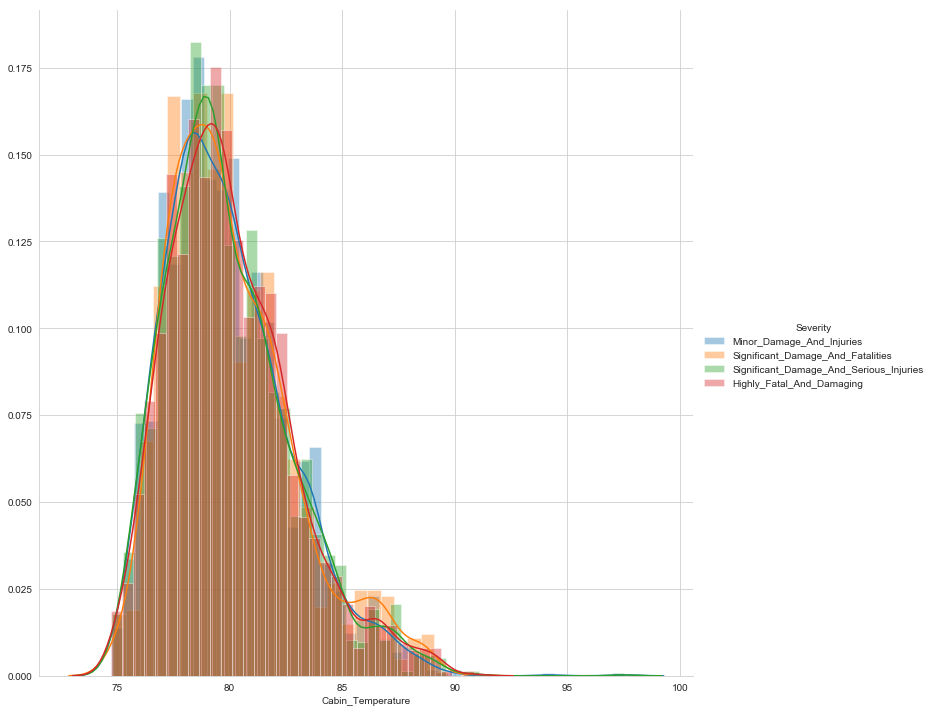

In [13]:

print(train_raw['Cabin_Temperature'].describe())
sns.FacetGrid(train_raw, hue="Severity", size=10) \
   .map(sns.distplot, "Cabin_Temperature") \
   .add_legend();
plt.show();


count    10000.000000
mean         3.814900
std          1.902577
min          1.000000
25%          2.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: Accident_Type_Code, dtype: float64


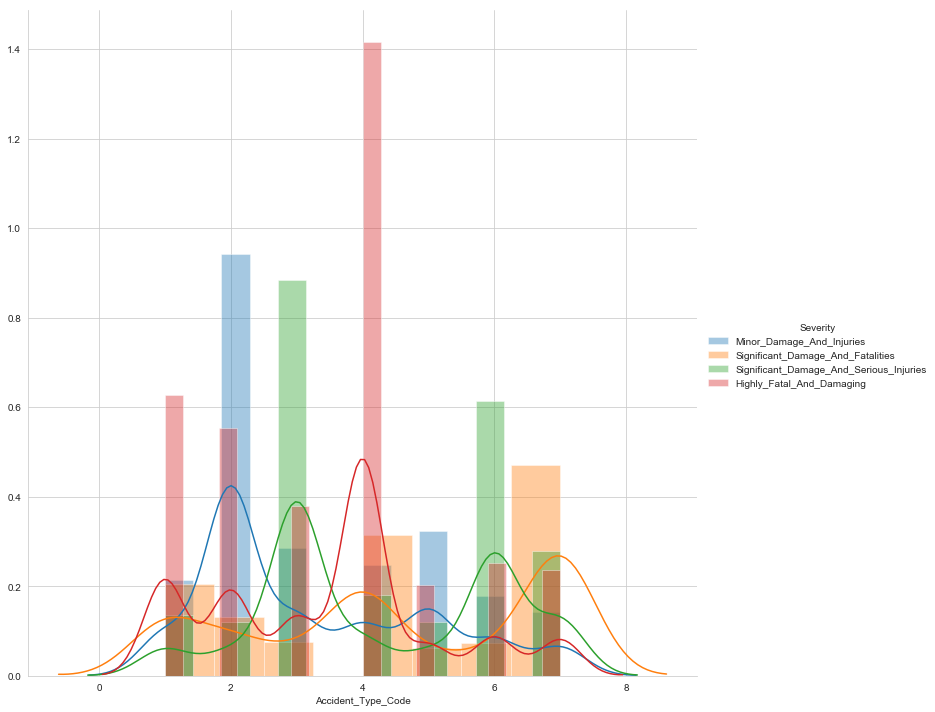

In [14]:

print(train_raw['Accident_Type_Code'].describe())
sns.FacetGrid(train_raw, hue="Severity", size=10) \
   .map(sns.distplot, "Accident_Type_Code") \
   .add_legend();
plt.show();


count    10000.000000
mean     32001.803282
std       9431.995196
min        831.695553
25%      25757.636908
50%      32060.336419
75%      38380.641513
max      64297.651218
Name: Max_Elevation, dtype: float64


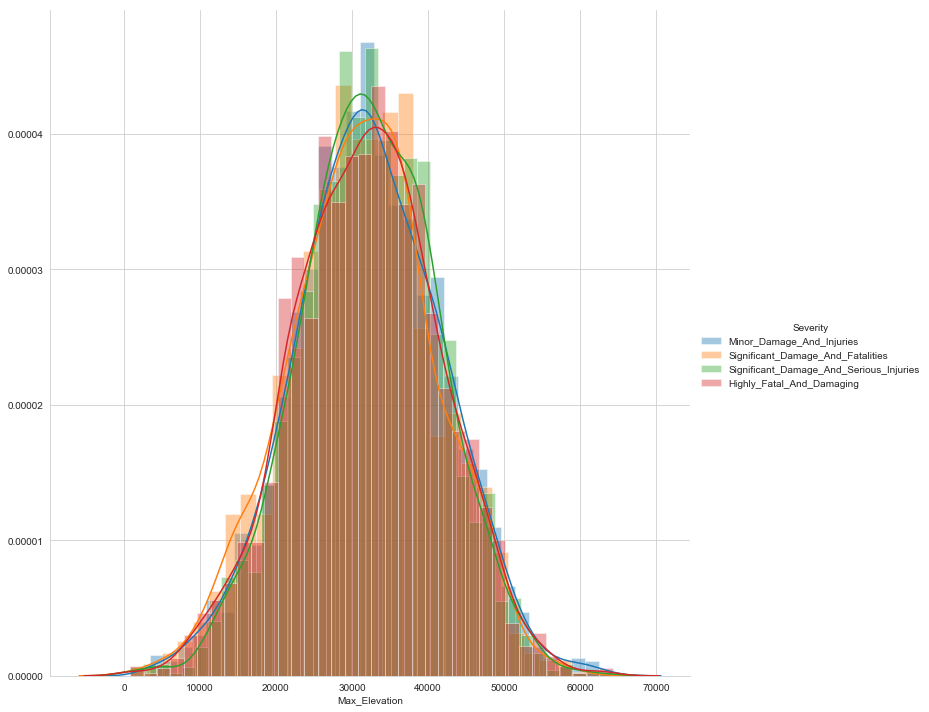

In [15]:

print(train_raw['Max_Elevation'].describe())
sns.FacetGrid(train_raw, hue="Severity", size=10) \
   .map(sns.distplot, "Max_Elevation") \
   .add_legend();
plt.show();


count    10000.00000
mean         2.01220
std          1.03998
min          0.00000
25%          1.00000
50%          2.00000
75%          3.00000
max          5.00000
Name: Violations, dtype: float64


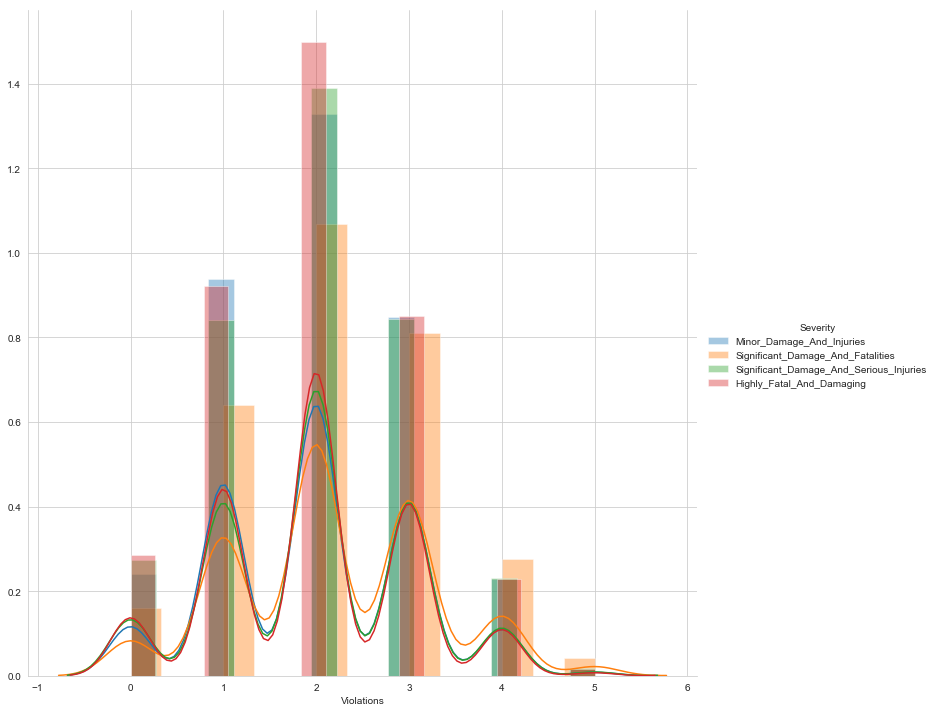

In [16]:

print(train_raw['Violations'].describe())
sns.FacetGrid(train_raw, hue="Severity", size=10) \
   .map(sns.distplot, "Violations") \
   .add_legend();
plt.show();


count    10000.000000
mean         0.255635
std          0.381128
min          0.000316
25%          0.012063
50%          0.074467
75%          0.354059
max          2.365378
Name: Adverse_Weather_Metric, dtype: float64


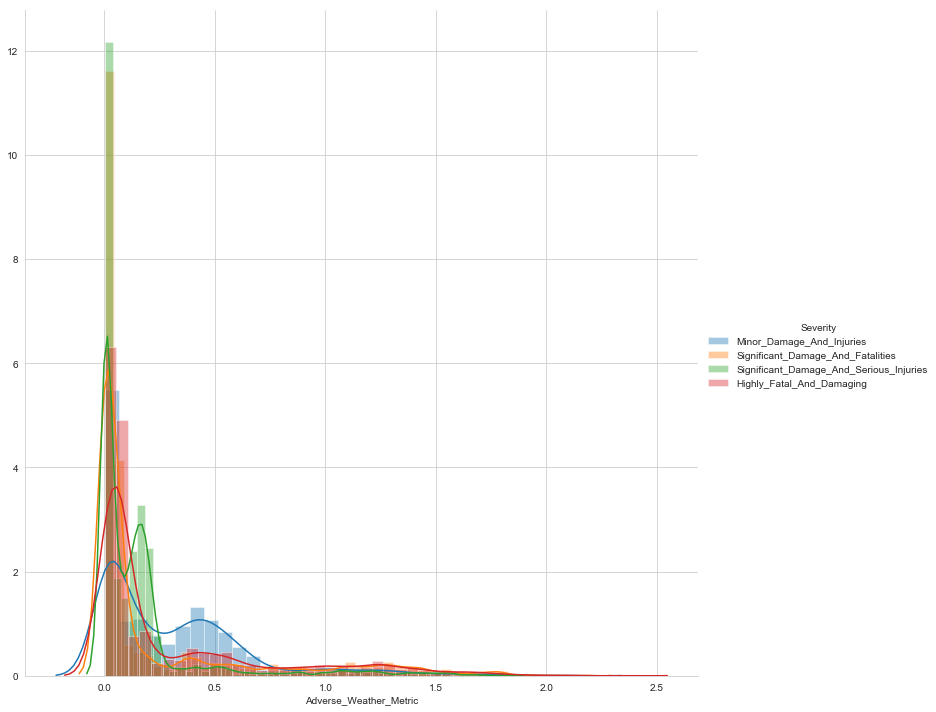

In [17]:

print(train_raw['Adverse_Weather_Metric'].describe())
sns.FacetGrid(train_raw, hue="Severity", size=10) \
   .map(sns.distplot, "Adverse_Weather_Metric") \
   .add_legend();
plt.show();


## From Pair Plots Days_since_inception vs Safety_score looks interesting
    -- Taking a closer look

<Figure size 1080x1080 with 0 Axes>

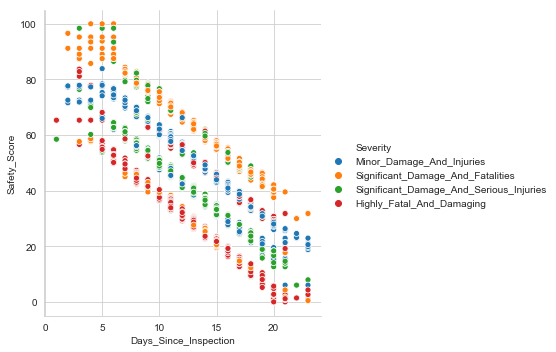

In [24]:
plt.figure(figsize=(15,15))
sns.relplot(x='Days_Since_Inspection',y='Safety_Score',data=train_raw,hue='Severity')
plt.show()

## Checking for missing values

In [25]:
train_raw[train_raw.isnull().any(axis=1)]

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID


## Checking Duplicate values

In [26]:
train_raw[train_raw.duplicated(keep=False)]

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID


## applying t-SNE
    -- checking for data seperatabilty in 2d space

In [30]:
from sklearn.manifold import TSNE

labels=train_raw['Severity']
model =TSNE(n_components=2, random_state=0,perplexity=5)
tsne_data_bow = model.fit_transform(train_raw.loc[:, train_raw.columns != 'Severity'])
temp=tsne_data_bow

In [31]:
labels=labels[:,np.newaxis]
print(tsne_data_bow.shape)
print(labels.shape)

(10000, 2)
(10000, 1)


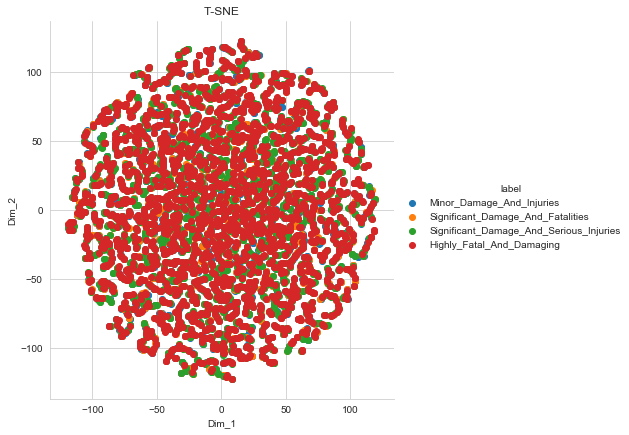

In [32]:
#creating a new data frame which help us in ploting the result data
temp1 = np.concatenate((temp, labels),axis=1)
temp1 = pd.DataFrame(data=temp1, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(temp1, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("T-SNE")
plt.show()

(10000, 2)
(10000, 1)


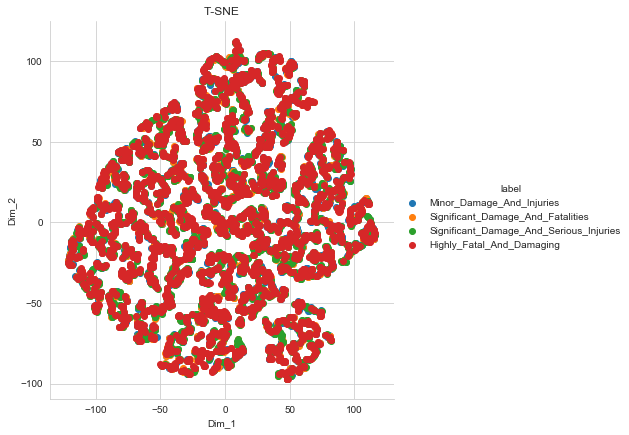

In [33]:
from sklearn.manifold import TSNE

labels=train_raw['Severity']
model =TSNE(n_components=2, random_state=0,perplexity=15)
tsne_data_bow = model.fit_transform(train_raw.loc[:, train_raw.columns != 'Severity'])
temp=tsne_data_bow

labels=labels[:,np.newaxis]
print(tsne_data_bow.shape)
print(labels.shape)

#creating a new data frame which help us in ploting the result data
temp1 = np.concatenate((temp, labels),axis=1)
temp1 = pd.DataFrame(data=temp1, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(temp1, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("T-SNE")
plt.show()

(10000, 2)
(10000, 1)


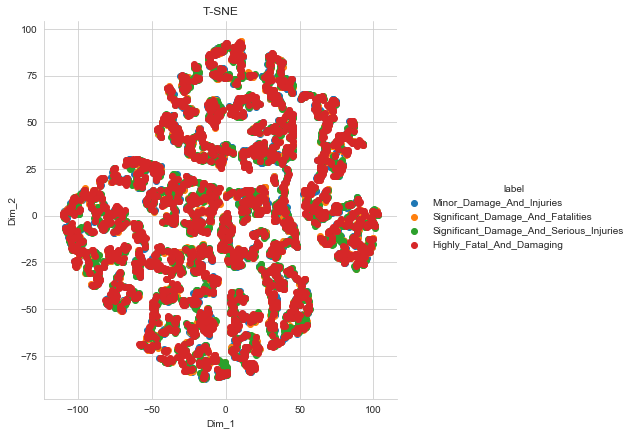

In [34]:
from sklearn.manifold import TSNE

labels=train_raw['Severity']
model =TSNE(n_components=2, random_state=0,perplexity=25)
tsne_data_bow = model.fit_transform(train_raw.loc[:, train_raw.columns != 'Severity'])
temp=tsne_data_bow

labels=labels[:,np.newaxis]
print(tsne_data_bow.shape)
print(labels.shape)

#creating a new data frame which help us in ploting the result data
temp1 = np.concatenate((temp, labels),axis=1)
temp1 = pd.DataFrame(data=temp1, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(temp1, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("T-SNE")
plt.show()

(10000, 2)
(10000, 1)


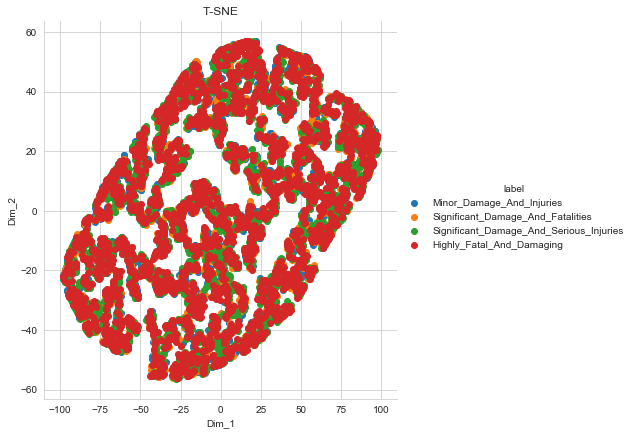

In [35]:
from sklearn.manifold import TSNE

labels=train_raw['Severity']
model =TSNE(n_components=2, random_state=0,perplexity=50)
tsne_data_bow = model.fit_transform(train_raw.loc[:, train_raw.columns != 'Severity'])
temp=tsne_data_bow

labels=labels[:,np.newaxis]
print(tsne_data_bow.shape)
print(labels.shape)

#creating a new data frame which help us in ploting the result data
temp1 = np.concatenate((temp, labels),axis=1)
temp1 = pd.DataFrame(data=temp1, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(temp1, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("T-SNE")
plt.show()